# KeyNMF

In [1]:
# Required packages

!pip install pandas
import pandas as pd

!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

!pip install turftopic
from turftopic import KeyNMF

!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import shapiro

!pip install seaborn
import seaborn as sns


import numpy as np

import re


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


/home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/_snmf.py:19: UserWarning: JAX not found, continuing with NumPy implementation.
  warnings.warn("JAX not found, continuing with NumPy implementation.")


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Load data and define enviromental keywords and temporal markers

In [2]:

# Load data
all_df = pd.read_csv('source_filtered_df.csv')


environmental_issues = {
    "Atmosphere": [
        "air quality", "smog", "ozone", 
        "particulate matter", "emissions", "air composition", "PM2.5"
    ],

    "Biodiversity": [
        "biodiversity", "species", "wildlife", 
        "ecosystem", "microbes", "pollinators", "species richness"
    ],

    "Forests": [
        "tree species", "rainforest", "forest floor", "wilderness", 
        "forest ecosystem", "plant species", "undergrowth", "forest biodiversity"
    ],

    "Oceans": [
        "marine life", "coral bleaching", "fish species", 
        "fishing", "marine ecosystem", "trawling", "seabed"
    ]
}



# Define temporal markers
temporal_markers = [
    "recently", "in the past", "over time", "historically",
    "nowadays", "currently", "since", "during", "earlier", "before",
    "long ago", "previously", "in recent years", "lately", "over the years",
    "formerly", "once", "used to be", "up to now", "so far",
    "to date", "throughout history", "back then", "1800s", "18th century", "1900s", "19th century", 
    "change", "degradation", "restoration", "more than before", "less than before", "compared to earlier", "change over time"
]

def count_temporal_markers(text, markers):
    text_lower = str(text).lower()
    return sum(text_lower.count(marker) for marker in markers)

## weighted average of temporal markers pr document

In [3]:

# Process each environmental issue
issue_results = {}

for issue, keywords in environmental_issues.items():
    print(f"\nProcessing {issue}...")

    # Filter articles
    keyword_pattern = '|'.join(keywords)
    df_issue = all_df[all_df['text'].str.contains(keyword_pattern, case=False, na=False)].reset_index(drop=True)

    if df_issue.empty:
        print(f"No articles found for {issue}")
        continue

    # Optional sampling for large datasets
    max_articles = 500  
    if len(df_issue) > max_articles:
        df_issue = df_issue.sample(max_articles, random_state=42).reset_index(drop=True)
        print(f"Sampled {max_articles} articles for {issue}")


    # Fit KeyNMF on the text
    documents = df_issue['text'].astype(str).tolist()
    n_topics = 5  # adjust as needed
    model = KeyNMF(n_topics, top_n=6, random_state=42)
    model.fit(documents)

    # Get topic-term information
    topics = model.print_topics()
    issue_results[issue] = {
        "df": df_issue,
        "model": model,
        "topics": topics
    }

    # Count temporal markers per article
    df_issue['temporal_count'] = df_issue['text'].apply(lambda x: count_temporal_markers(x, temporal_markers))
    df_issue['temporal_rel_freq'] = df_issue['temporal_count'] / df_issue['text'].str.split().str.len()



Processing Atmosphere...
Sampled 500 articles for Atmosphere


Output()

[12:43:55] Keyword extraction done.                                                                   ]8;id=251501;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=231256;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#238\238]8;;\

           Model fitting done.                                                                        ]8;id=758074;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=499426;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#245\245]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                                  ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ emissions, pollution, carbon, sustainable, environmental, co2, methane, diesel, polluting, fuels │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ climate, warming, temperatures, temperature, weather, wildfires, 2024, 2030, 2050, pollution     │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ renewable, renewables, energy, electricity, solar, nuclear, sustainable, alberta, reactors, coal │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ tariffs, tariff, inflation, economy, exports, trump, gdp, trudeau, euro, alberta                 │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ vehicles, vehicle, tax, diesel, ev, evs, cars, car, automotive, taxation                         │
└──────────┴──────────────────────────────────────────────────────────────────────────────────────────────────┘


Processing Biodiversity...
Sampled 500 articles for Biodiversity


Output()

[12:46:46] Keyword extraction done.                                                                   ]8;id=634705;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=714175;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#238\238]8;;\

           Model fitting done.                                                                        ]8;id=197684;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=670824;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#245\245]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                                    ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ wildlife, animals, endangered, species, animal, birds, habitat, bear, habitats, bird               │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ trees, forests, forest, tree, deforestation, forestry, woodland, woodlands, planting, biodiversity │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ shark, fish, sharks, whale, fishing, sea, marine, whales, coast, coastal                           │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ insects, insect, bees, bee, pest, species, flies, pesticides, honey, creatures                     │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ garden, gardens, park, plants, planting, flowers, woodland, gardeners, dunedin, parks              │
└──────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘


Processing Forests...
Sampled 500 articles for Forests


Output()

[12:49:34] Keyword extraction done.                                                                   ]8;id=252652;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=717832;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#238\238]8;;\

           Model fitting done.                                                                        ]8;id=936586;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=840736;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#245\245]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                         ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ trees, forest, tree, forests, woodland, forestry, deforestation, forested, oak, birch   │
├──────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ wilderness, hike, hiking, wildlife, trail, mountains, scotland, bear, walk, wales       │
├──────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ beaches, island, islands, beach, coastline, coast, coastal, tourism, thai, seaside      │
├──────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ wildfires, fires, wildfire, burning, wildlife, burn, blaze, endangered, lookout, burnt  │
├──────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ rainforest, indigenous, tribe, peru, tribes, river, drought, peruvian, rivers, internet │
└──────────┴─────────────────────────────────────────────────────────────────────────────────────────┘


Processing Oceans...
Sampled 500 articles for Oceans


Output()

[12:52:24] Keyword extraction done.                                                                   ]8;id=894377;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=295058;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#238\238]8;;\

           Model fitting done.                                                                        ]8;id=825035;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=293647;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#245\245]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                            ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ beaches, beach, coastal, coastline, seaside, coast, resort, surf, mediterranean, shoreline │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ fishing, fish, fisheries, salmon, fisherman, river, trout, seafood, lobster, wildlife      │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ islands, island, cottages, cottage, beaches, greece, archipelago, volcanic, resort, isle   │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ sea, boat, ocean, boats, seawater, coast, whale, marine, whales, oceans                    │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ shark, sharks, swam, divers, fish, diving, underwater, wildlife, diver, reef               │
└──────────┴────────────────────────────────────────────────────────────────────────────────────────────┘

#### Each env issue has one average temp marker frequency across all documents. And not all docs weighs equally
#### Does not show variance within the topics

In [4]:
issue_temporal = {}

for issue, res in issue_results.items():
    df_issue = res['df']
    if df_issue.empty:
        continue
    # Compute average relative frequency for the issue
    avg_rel_freq = df_issue['temporal_rel_freq'].mean()
    issue_temporal[issue] = avg_rel_freq


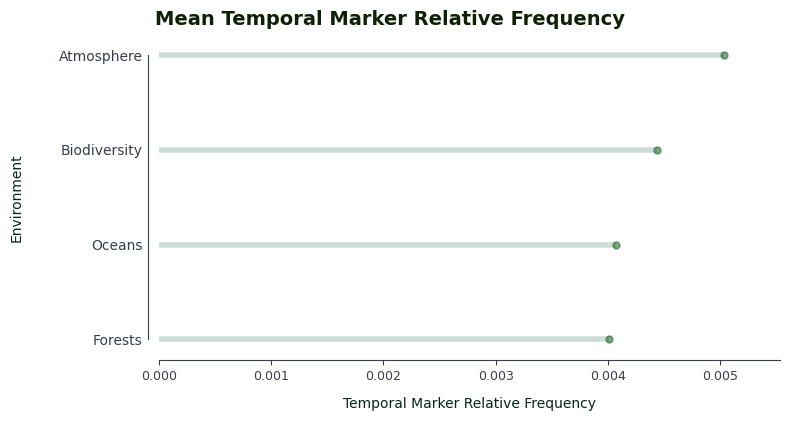

In [5]:
# set font and style
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.color'] = '#333F4B'
plt.rcParams['ytick.color'] = '#333F4B'
plt.rcParams['text.color'] = '#333F4B'

# Convert issue_temporal dict to DataFrame and sort by value
df = pd.DataFrame({'frequency': issue_temporal})
df = df.sort_values(by='frequency')

# numeric placeholder for y axis
y_pos = [i * 0.7 for i in range(1, len(df.index) + 1)]

# create figure and axis
fig, ax = plt.subplots(figsize=(8, max(4, len(df) * 0.1)))

# horizontal lines
ax.hlines(
    y=y_pos,
    xmin=0,
    xmax=df['frequency'],
    color='#00563F',
    alpha=0.2,
    linewidth=4
)

# dots
ax.plot(
    df['frequency'],
    y_pos,
    "o",
    markersize=5,
    color='#25692B',
    alpha=0.6
)

# axis labels
ax.set_xlabel(
    'Temporal Marker Relative Frequency',
    fontsize=10,
    fontweight='normal',
    color='#052613',
    labelpad=10
)

ax.set_ylabel(
    'Environment',
    fontsize=10,
    fontweight='normal',
    color='#052613',
    labelpad=25
)

# y-ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(df.index, fontsize=12)


fig.text(
    0.20, 1.04,
    'Mean Temporal Marker Relative Frequency',
    ha='left',
    va='top',
    fontsize=14,
    fontweight='black',
    color='#0E2107'
)

# axis limits
ax.set_xlim(0, df['frequency'].max() * 1.1)

# tick formatting
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', length=0)

# adjust axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds((min(y_pos), max(y_pos)))
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.tight_layout()
plt.show()


In [6]:

# Process each environmental issue
issue_results = {}

for issue, keywords in environmental_issues.items():
    print(f"\nProcessing {issue}...")


    # Filter articles by keywords

    keyword_pattern = '|'.join(keywords)
    df_issue = all_df[
        all_df['text'].str.contains(keyword_pattern, case=False, na=False)
    ].reset_index(drop=True)

    if df_issue.empty:
        print(f"No articles found for {issue}")
        continue


    # Optional sampling for large datasets

    #max_articles = 1000
    #if len(df_issue) > max_articles:
        #df_issue = df_issue.sample(max_articles, random_state=42).reset_index(drop=True)
        #print(f"Sampled {max_articles} articles for {issue}")

    # Fit KeyNMF on the text

    documents = df_issue['text'].astype(str).tolist()
    n_topics = 5
    model = KeyNMF(n_topics, top_n=6, random_state=42)
    model.fit(documents)


    # Temporal marker frequencies per document

    df_issue['temporal_count'] = df_issue['text'].apply(
        lambda x: count_temporal_markers(x, temporal_markers)
    )
    df_issue['temporal_rel_freq'] = (
        df_issue['temporal_count'] / df_issue['text'].str.split().str.len()
    )


    # Document–topic matrix

    W = model.document_topic_matrix  # shape: (n_docs, n_topics)


    # Per-document temporal frequency per topic

    topic_temporal_doc = {}  # per-document values
    topic_temporal_avg = {}  # weighted average for plotting

    for i in range(n_topics):
        topic_name = f"topic_{i}"

        weighted_freq = df_issue['temporal_rel_freq'] * W[:, i]

        # Store per-document values
        topic_temporal_doc[topic_name] = weighted_freq.values

        # Weighted average (optional, for bar plots)
        topic_temporal_avg[topic_name] = weighted_freq.sum() / W[:, i].sum()


    # Store everything for this issue

    issue_results[issue] = {
        "df": df_issue,
        "model": model,
        "topic_temporal_doc": topic_temporal_doc,
        "topic_temporal_avg": topic_temporal_avg
    }

print("\nProcessing complete!")





Processing Atmosphere...


Output()

           Model fitting done.                                                                        ]8;id=772296;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=766890;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#245\245]8;;\


Processing Biodiversity...


Output()

[13:09:53] Keyword extraction done.                                                                   ]8;id=452393;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=708570;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#238\238]8;;\

           Model fitting done.                                                                        ]8;id=275412;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=291949;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#245\245]8;;\


Processing Forests...


Output()

[13:14:10] Keyword extraction done.                                                                   ]8;id=319709;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=708955;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#238\238]8;;\

           Model fitting done.                                                                        ]8;id=544426;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=613623;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#245\245]8;;\


Processing Oceans...


Output()

[13:20:09] Keyword extraction done.                                                                   ]8;id=702053;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=561617;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#238\238]8;;\

           Model fitting done.                                                                        ]8;id=263962;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py\keynmf.py]8;;\:]8;id=78689;file:///home/ucloud/.local/lib/python3.12/site-packages/turftopic/models/keynmf.py#245\245]8;;\


Processing complete!


## Plotting the per-doc weighted values (stats)

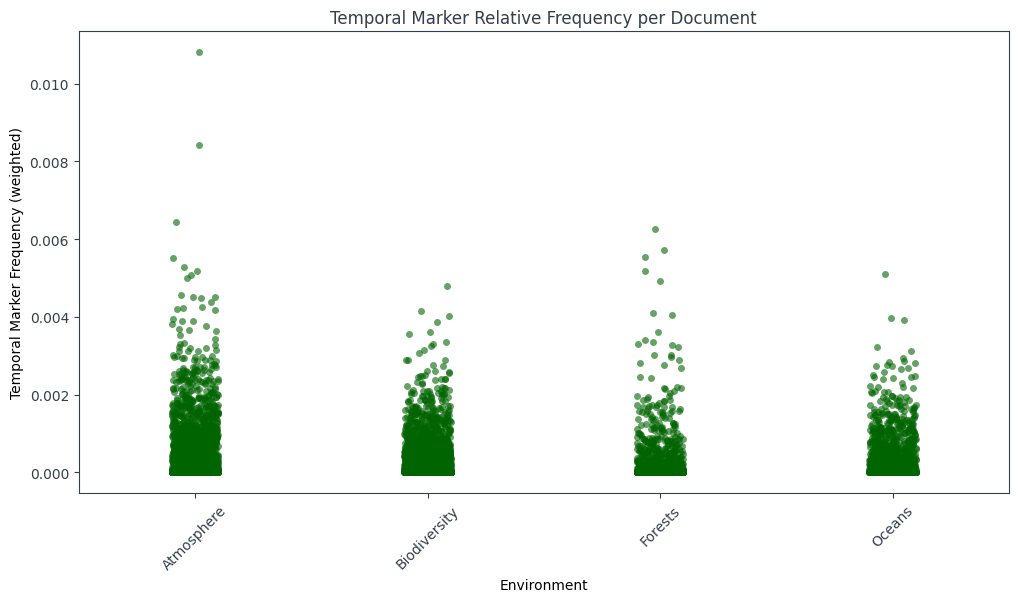

In [7]:

# Prepare long-format data (one point per document, weighted)

all_data = []

for issue, results in issue_results.items():
    topic_doc = results['topic_temporal_doc']
    n_docs = len(results['df'])
    
    for i in range(n_docs):
        # Sum weighted temporal frequencies across all topics for this document
        doc_weighted = sum(topic_doc[topic][i] for topic in topic_doc)
        all_data.append({
            "issue": issue,
            "temporal_freq": doc_weighted
        })

df_long = pd.DataFrame(all_data)


# Scatter / stripplot

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_long,
    x='issue',
    y='temporal_freq',
    jitter=True,
    alpha=0.6,
    color="darkgreen"
)

plt.ylabel("Temporal Marker Frequency (weighted)")
plt.xlabel("Environment")
plt.title("Temporal Marker Relative Frequency per Document")
plt.xticks(rotation=45)
plt.show()



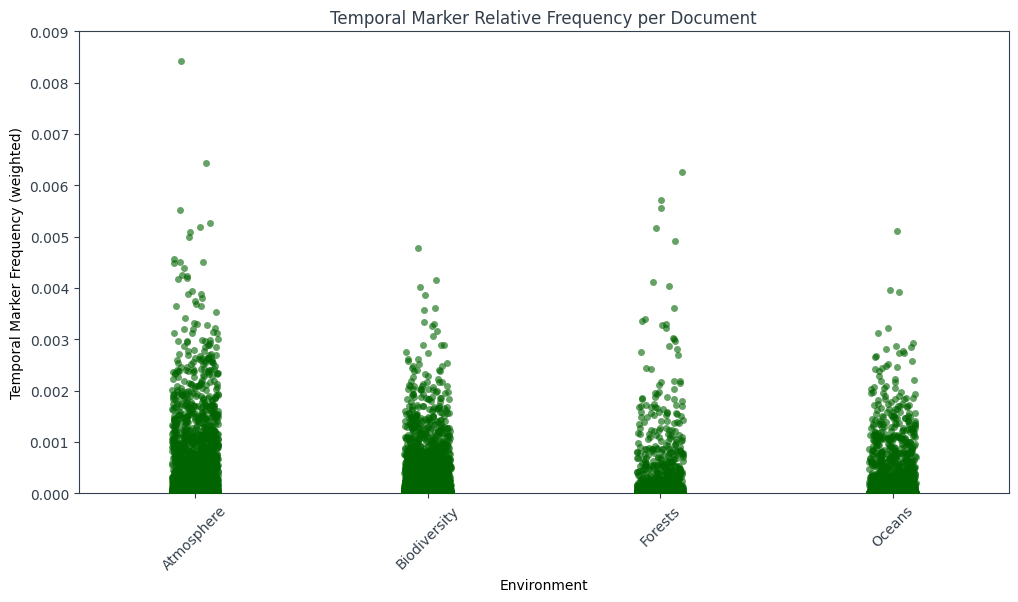

In [10]:
# Prepare long-format data (one point per document, weighted)

all_data = []

for issue, results in issue_results.items():
    topic_doc = results['topic_temporal_doc']
    n_docs = len(results['df'])

    for i in range(n_docs):
        # Sum weighted temporal frequencies across all topics for this document
        weighted_freq = sum(
            topic_doc[topic][i] for topic in topic_doc
        )

        all_data.append({
            "issue": issue,
            "temporal_freq": weighted_freq
        })

df_long = pd.DataFrame(all_data)


# Scatter / strip plot

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_long,
    x="issue",
    y="temporal_freq",
    jitter=True,
    alpha=0.6,
    color="darkgreen"
)

plt.xlabel("Environment")
plt.ylabel("Temporal Marker Frequency (weighted)")
plt.title("Temporal Marker Relative Frequency per Document")
plt.xticks(rotation=45)

# Set y-axis maximum
plt.ylim(0, 0.009)

plt.show()


# Statistical tests

##### The chunk below computes the average mean of temporal markers per environmental issue and compare them to each -> test whether there is a significant difference between the number of temp markers across env issues

In [11]:
# Aggregate weighted temporal freq per document for each issue
all_data = []
for issue, results in issue_results.items():
    topic_doc = results['topic_temporal_doc']
    for i in range(len(results['model'].document_topic_matrix)):
        # sum weighted frequencies across topics for this document
        doc_weighted = sum(topic_doc[topic][i] for topic in topic_doc)
        all_data.append({
            "issue": issue,
            "temporal_freq": doc_weighted
        })

df_long = pd.DataFrame(all_data)

# Kruskal-Wallis across environmental issues
groups = [df_long[df_long['issue'] == issue]['temporal_freq'] for issue in df_long['issue'].unique()]
from scipy.stats import kruskal
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis across issues: H={stat:.3f}, p={p:.3f}")


Kruskal-Wallis across issues: H=390.223, p=0.000


In [12]:
print(f"Kruskal-Wallis across issues: H={stat:.3f}, p={p:.3e}")


Kruskal-Wallis across issues: H=390.223, p=2.903e-84


## Numbers of articles pr env issue

In [ ]:
# Dictionary to store counts
issue_counts = {}

for issue, keywords in environmental_issues.items():
    # Build regex pattern safely
    import re
    keyword_pattern = '|'.join(re.escape(k) for k in keywords)

    # Filter articles
    df_issue = all_df[all_df['text'].str.contains(keyword_pattern, case=False, na=False)]

    # Store the number of articles
    issue_counts[issue] = len(df_issue)

# Print counts
for issue, count in issue_counts.items():
    print(f"{issue}: {count} articles")
